In [85]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [86]:
# Use mpg_df.plot(x = 'mpg', y = 'horsepower', kind ='scatter', facecolor = 'blue')
# Easier bc you can choose any column for axes, don't need separate series for them...?

# Bubble size: At least as of matplotlib 1.3.1, the marker size for scatter plots is already scaled by area 
#(see scatter plot documentation) Using the square root gives the incorrect marker sizes..
## OR: ax.scatter(df2['Place'],df2['Name'], s=df2['00:00:00'])
## SOMEHOW: s=drivercount

#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]


In [100]:
# Create a reference to the CSVs and import into Pandas DataFrames

ride_csv = os.path.join("raw_data/", "ride_data.csv")
city_csv = os.path.join("raw_data/", "city_data.csv")

ride_df = pd.read_csv(ride_csv, low_memory=False)
city_df = pd.read_csv(city_csv, low_memory=False)

ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [109]:
## x = Total Number of rides per city: groupby city - count
## y = Average Fare: groupby city - mean (fare)
## color: city type...not sure how, 3 types.
## bubble size: bring in drivercount from other CSV.

#item_purchase_count = item_info.groupby(["Item ID", "Item Name"]).count()["Price"]
ride_count_by_city = ride_df.groupby("city").count()["fare"]
#ride_count_by_city

avg_fare_by_city = ride_df.groupby("city").mean()["fare"]
#avg_fare_by_city

ride_count_by_city

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [89]:
# min_count_by_city = pyber_df.groupby("city").count().min()
# min_count_by_city

# ride_count_by_city.min()

In [106]:
# Create summary dataframe

# Format to currency

# formatted_average_item_purchase = ["$%.2f" % member for member in average_item_purchase]
# formatted_total_item_purchase = ["$%.2f" % member for member in total_item_purchase]


# Create dataframe

summary_df = pd.DataFrame({"Ride Count": ride_count_by_city,
                           "Average Fare": avg_fare_by_city})

# Configure dataframe column order
summary_df = summary_df[["Ride Count", "Average Fare"]]

# Display top 5 items as measured by count
#item_purchases_df.sort_values("Purchase Count", ascending=False).head(5)

summary_df.head(5)

,Ride Count,Average Fare
city,,
Alvarezhaven,31,23.928710
Alyssaberg,26,20.609615
Anitamouth,9,37.315556
Antoniomouth,22,23.625000
Aprilchester,19,21.981579


In [91]:
# 
# summary_df.sort_values("Ride Count").head(5)

In [96]:
# Create scatterplot

city_rides = summary_df.plot(x = 'Ride Count', y = 'Average Fare', kind ='scatter', facecolor = 'blue', label='Type')
##plt.scatter(waterUsage['duration'], waterUsage['water_amount'],c=waterUsage['color'])
## facecolor = 'color' ???

######** BEFORE YOU THROW OUT .PLOT, a way to map colors and maybe size...
## https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

In [93]:
# Set textual properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="upper right")
#plt.legend(handles=[city_rides], loc="best")

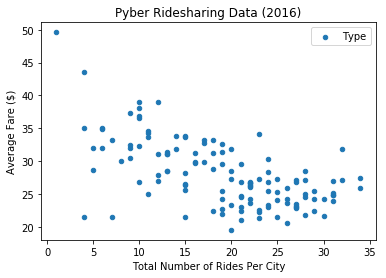

In [94]:
plt.show()

In [ ]:
## Figure out how to color on city type.
#colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}
## L/R join on city? But rows might be in diff order...
# could alphabetize both, full join, then 

In [115]:
#inner_merge_df = pd.merge(purchase_df, email_df, on="Customer ID")
#inner_merge_df

#merged_df = pd.merge(summary_df, city_df, on="city")

#merged_df = summary_df.merge(city_df, on='city')

#right_on=None, left_index=False,

merged_df = pd.merge(summary_df, city_df, right_on="city", left_index=True)
merged_df = merged_df.reset_index(drop=True)

merged_df.head(10)

,Ride Count,Average Fare,city,driver_count,type
0,31,23.928710,Alvarezhaven,21,Urban
1,26,20.609615,Alyssaberg,67,Urban
2,9,37.315556,Anitamouth,16,Suburban
3,22,23.625000,Antoniomouth,21,Urban
4,19,21.981579,Aprilchester,49,Urban
5,31,25.106452,Arnoldview,41,Urban
6,15,33.711333,Campbellport,26,Suburban
7,10,36.606000,Carrollbury,4,Suburban
8,29,25.395517,Carrollfort,55,Urban
9,12,31.051667,Clarkstad,21,Suburban
